In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
from sklearn.linear_model import LogisticRegression
import pymc as pm

## The Dataset

You can download the dataset from here: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [2]:
## 1 point

## ToDo: read the csv file into a dataframe and show the first 5 rows
diab_df = pd.read_csv("/content/diabetes.csv")
diab_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
## 3 points

## Assign the Outcome variable to y and the rest to X.
## USe LogisticRegression to fit the data and print out the intercept and the coefficients
y = diab_df["Outcome"]
X = diab_df.loc[:, diab_df.columns != "Outcome"]
clf = LogisticRegression(random_state=0).fit(X, y)
print("intercept: ", clf.intercept_)
print("coefficients: ", clf.coef_)

intercept:  [-7.70291291]
coefficients:  [[ 1.17252342e-01  3.35998330e-02 -1.40873785e-02 -1.27048112e-03
  -1.24032092e-03  7.72023486e-02  1.41904173e+00  1.00353713e-02]]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
## 2 points

## Explain what the code is doing:
## What are the prior probabilities of the intercept and coefficients?
# Which likelihood distribution has been used?
## What does pm.invlogit(linreg) mean?
## What is map_est?

with pm.Model() as logreg_model:
  
    w0 = pm.Normal('w0', mu=0, sigma=100)
    w1 = pm.Normal('w1', mu=0, sigma=100)
    w2 = pm.Normal('w2', mu=0, sigma=100)
    w3 = pm.Normal('w3', mu=0, sigma=100)
    w4 = pm.Normal('w4', mu=0, sigma=100)
    w5 = pm.Normal('w5', mu=0, sigma=100)
    w6 = pm.Normal('w6', mu=0, sigma=100)
    w7 = pm.Normal('w7', mu=0, sigma=100)
    w8 = pm.Normal('w8', mu=0, sigma=100)
   
    
    linreg = w0 * np.ones(diab_df.shape[0]) + w1 * diab_df.Pregnancies.values + w2 * diab_df.Glucose.values \
    + w3 * diab_df.BloodPressure.values + w4 * diab_df.SkinThickness.values + w5 * diab_df.Insulin.values + \
    w6 * diab_df.BMI.values + w7 * diab_df.DiabetesPedigreeFunction.values + w8 * diab_df.Age.values
    p_outcome = pm.invlogit(linreg)

    likelihood = pm.Bernoulli('likelihood', p_outcome, observed=diab_df.Outcome.values)

    
    map_est= pm.find_MAP()
    print(map_est)


{'w0': array(-8.40166888), 'w1': array(0.12311865), 'w2': array(0.0351519), 'w3': array(-0.01329542), 'w4': array(0.00061588), 'w5': array(-0.0011909), 'w6': array(0.0896803), 'w7': array(0.94448272), 'w8': array(0.01486235)}


- What are the prior probabilities of the intercept and coefficients?
  *   Normal distributions. 
  *   Intercept (w0): Normal distributions with mean 0 and sd 100.
  *   Coefficients (w1-w8): Normal distributions with mean 0 and sd 100.
- Which likelihood distribution has been used?
  *   Bernoulli distribution
- What does pm.invlogit(linreg) mean?
  *   It transforms linear regression model onto the unit interval [0, 1], using inverse logit function.
- What is map_est?
  *   It is the Maximum A Posteriori estimate of the model parameters. It shows the values of the parameters that maximize the posterior probability density function. 


array([[<Axes: title={'center': 'w0'}>, <Axes: title={'center': 'w1'}>,
        <Axes: title={'center': 'w2'}>],
       [<Axes: title={'center': 'w3'}>, <Axes: title={'center': 'w4'}>,
        <Axes: title={'center': 'w5'}>],
       [<Axes: title={'center': 'w6'}>, <Axes: title={'center': 'w7'}>,
        <Axes: title={'center': 'w8'}>]], dtype=object)

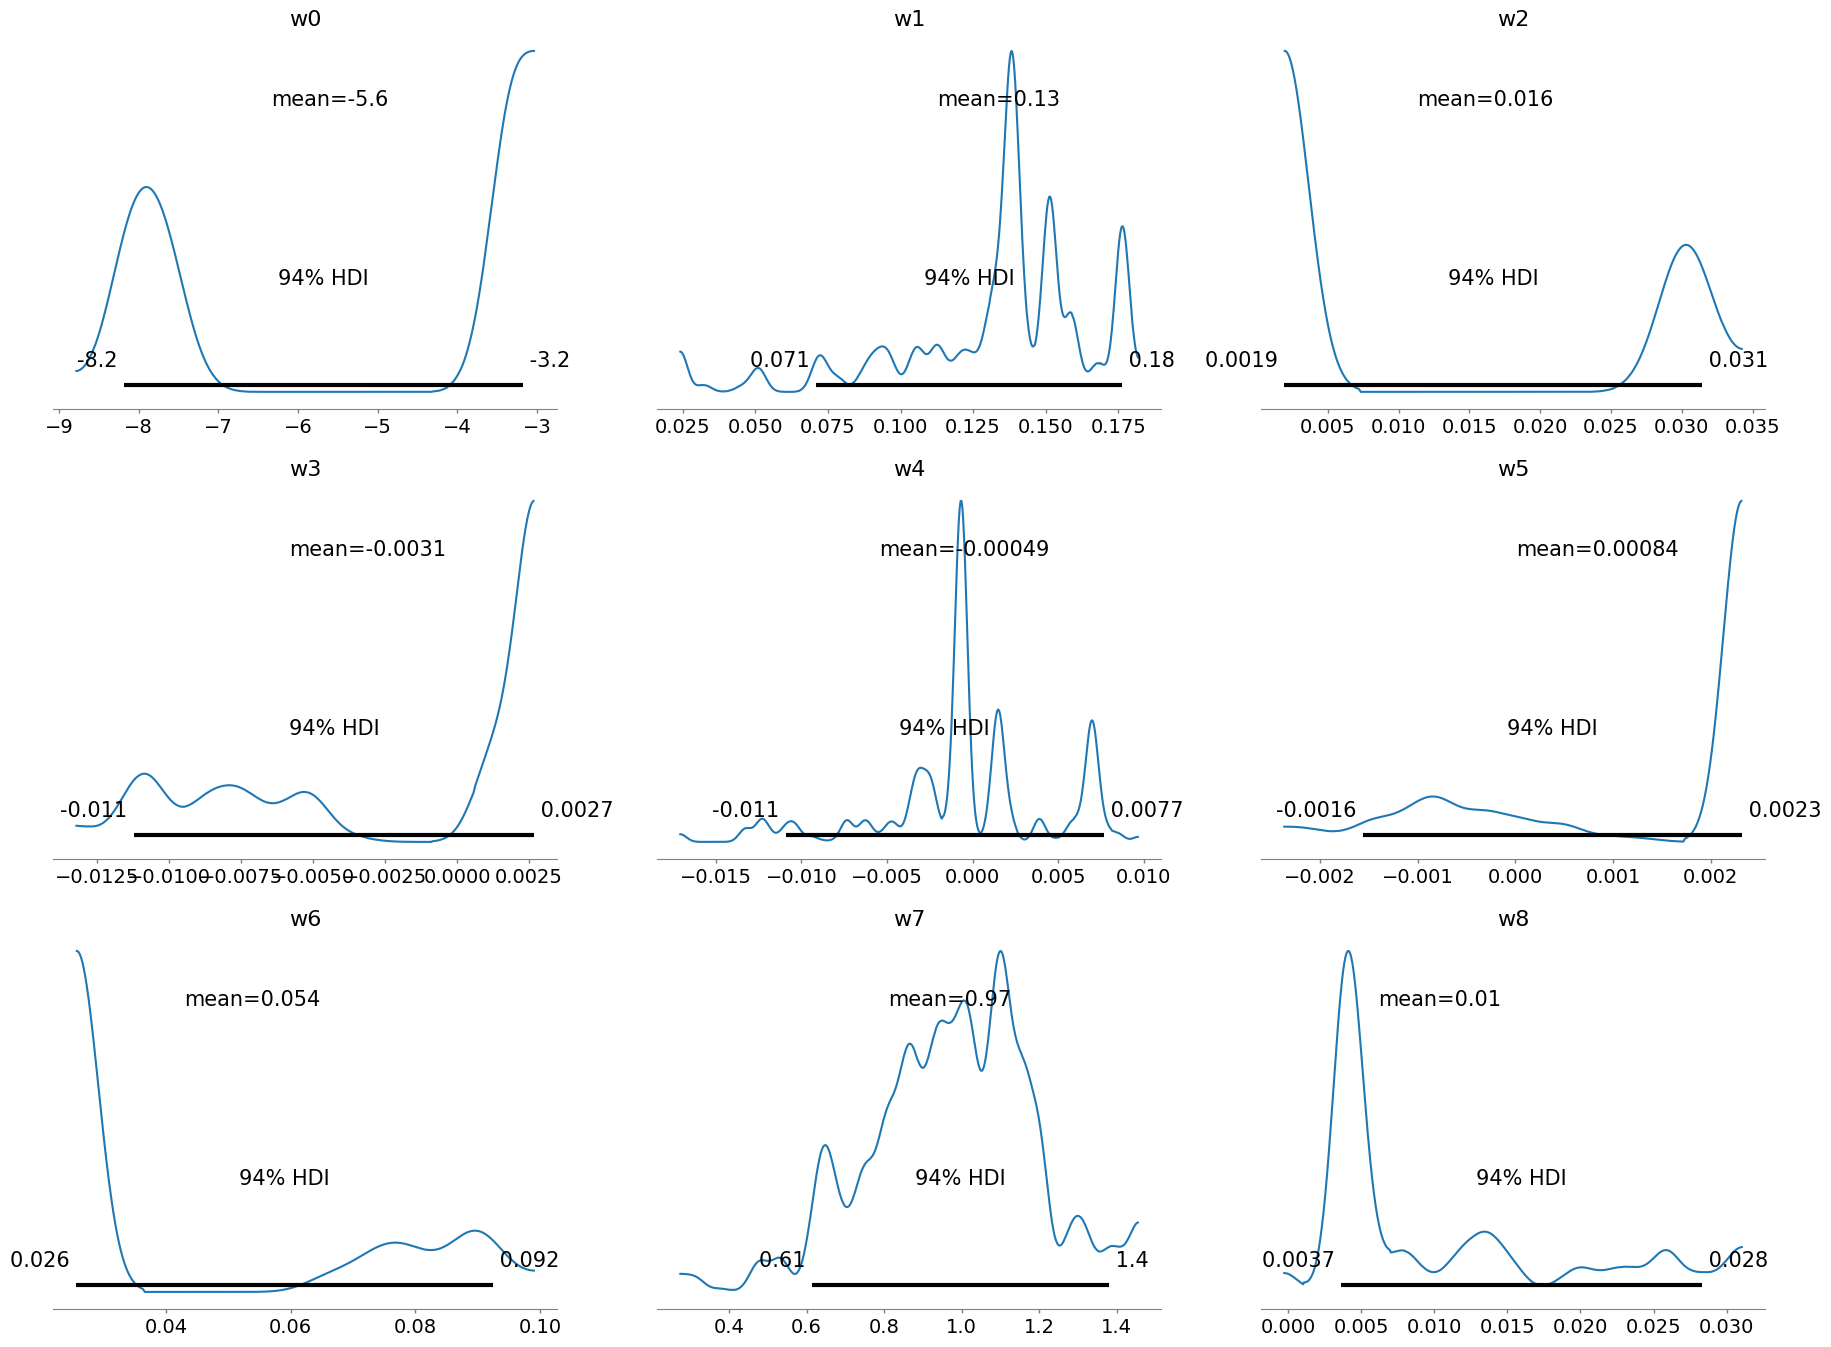

In [5]:
## 2 points

with logreg_model:
## ToDo: draw 400 samples using pm.Metropolis() and assign to the variable trace
  trace = pm.sample(draws=400, step=pm.Metropolis())


## Explain the output of the plot 
az.plot_posterior(trace)

* Explain the output of the plot
  * It shows the posterior distributions of the parameters (w0-w8), with the statistics: mean, median, highest density interval.